In [47]:
#inferences
print('Observations and Inferences')
observ_1 = '1. It appears that Capomulin and Ramicane had seen the lowest tumor growth of the four treatments looked at. Although we see this, a better analysis would be given through looking at initial tumor size to final size. This would provide a means to assess whether the treatments work better in smaller sizes or large sizes of tumors at the start.'
observ_2 = '2. The Capomulin unique mouse (specifically l509) across timepoints lineplot is a great example of looking at the efficacy of the treatment. It describes how at a particular timepoint the treatment was less effective, while earlier on it worked very well and lowered tumor size. The question, though, drawn from this data is why did the treatment become less effective? This dataset could be comparied to other mice who received the same treatment to assess whether it might be tumor size, weight of mouse, or even gender.'
observ_3 = '3. Using the scatterplot that details average tumor size and weight provides insight on the positive correlation between weight and tumor size. The scatterplot, however, can be adjusted to include timepoints and see if weight decreased or increased with treatment attempts to see if there are any potential side effects to treatment that cause weightloss, etc. Along with this, it would be beneficial to also use a legend and compare the treament regimens as well.'
print(observ_1)
print(observ_2)
print(observ_3)

#make csv file
observs = [observ_1, observ_2, observ_3]

tuples_list = list(zip(observs)) 
observations = pd.DataFrame(tuples_list, columns = ['Observations'])

observations.to_csv('Pymaceuticals_Observations/Pymaceuticals_Observations.csv', index = False, header = True)


Observations and Inferences
1. It appears that Capomulin and Ramicane had seen the lowest tumor growth of the four treatments looked at. Although we see this, a better analysis would be given through looking at initial tumor size to final size. This would provide a means to assess whether the treatments work better in smaller sizes or large sizes of tumors at the start.
2. The Capomulin unique mouse (specifically l509) across timepoints lineplot, is a great example of looking at the efficacy of the treatment. It describes how at a particular timepoint the treatment was less effective, while earlier on it worked very well and lowered tumor size. The question, though, drawn from this data is why did the treatment become less effective? This dataset could be comparied to other mice who received the same treatment to assess whether it might be tumor size, weight of mouse, or even gender.
3. Using the scatterplot that details average tumor size and weight provides insight on the positive co

In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#merge data
mouse_study_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')

#cleaning data (count of mice)
mouse_count = len(mouse_study_df['Mouse ID'].value_counts())
mouse_count

249

In [4]:
#cleaning data (checking for duplicates)
duplicate = mouse_study_df[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_id = duplicate['Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [5]:
#displaying all duplicate values
duplicate = mouse_study_df[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#drop duplicate data
cleaned_mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != duplicate_id[0]]
cleaned_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
#checking to ensure that duplicate was deleted
duplicate_two = cleaned_mouse_study_df[cleaned_mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_two

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [8]:
#checking to ensure correct length is still present
mouse_count = len(cleaned_mouse_study_df['Mouse ID'].value_counts())
mouse_count

248

In [9]:
#summary statistics
#collecting data from dataframe
drug_regimen = cleaned_mouse_study_df.groupby('Drug Regimen')

mean_drug_regimen = drug_regimen['Tumor Volume (mm3)'].mean()
median_drug_regimen = drug_regimen['Tumor Volume (mm3)'].median()
variance_drug_regimen = drug_regimen['Tumor Volume (mm3)'].var()
stdev_drug_regimen = drug_regimen['Tumor Volume (mm3)'].std()
sterror_drug_regimen = drug_regimen['Tumor Volume (mm3)'].sem()
name_drug_regimen = drug_regimen['Drug Regimen'].unique()

#generating dataframe
list_of_tuples = list(zip(name_drug_regimen, mean_drug_regimen, median_drug_regimen, variance_drug_regimen, stdev_drug_regimen, sterror_drug_regimen))
drug_regimen_df = pd.DataFrame(list_of_tuples,columns = ['Drug_Regimen', 'Mean_Tumor_Volume', 'Median_Tumor_Volume', 'Tumor_Volume_Variance', 'Tumor_Volume_Std.Dev.', 'Tumor_Volume_Std.Error'])

#formatting
drug_regimen_df['Drug_Regimen'] = drug_regimen_df['Drug_Regimen'].str[0]
drug_regimen_df = drug_regimen_df.set_index('Drug_Regimen')
drug_regimen_df


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std.Dev.,Tumor_Volume_Std.Error
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#aggregate method
summary_drug_regimen_df = drug_regimen.aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_drug_regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

[Text(0, 0.5, 'Number of Unique Mice Tested'),
 Text(0.5, 1.0, 'Unique Mice Tested with Different Drug Regimen')]

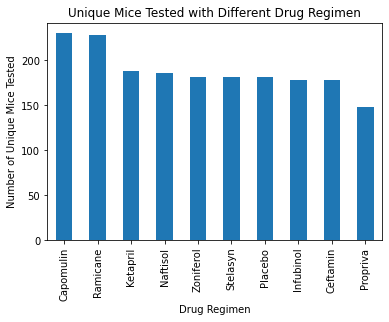

In [43]:
#generating bar graph using pandas
drug_and_mouse_count = drug_regimen['Drug Regimen'].count()
new_drug_and_mouse_count = drug_and_mouse_count.sort_values(ascending = False)
pandas_bar_plot = new_drug_and_mouse_count.plot(kind = 'bar')
pandas_bar_plot.set(ylabel = 'Number of Unique Mice Tested', title = 'Unique Mice Tested with Different Drug Regimen')

Text(0.5, 1.0, 'Unique Mice Tested with Different Drug Regimen')

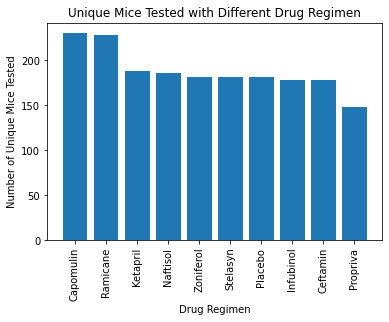

In [42]:
#generating bar graph using pyplot
x_axis = np.arange(len(drug_regimen))
y_axis = drug_regimen['Drug Regimen'].count()
y_axis = y_axis.sort_values(ascending = False)
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, y_axis.index, rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.title('Unique Mice Tested with Different Drug Regimen')

<AxesSubplot:ylabel='Sex'>

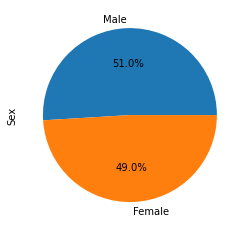

In [13]:
#generating pie plot using pandas
sex_values = cleaned_mouse_study_df['Sex'].value_counts()
sex_values.plot.pie(autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

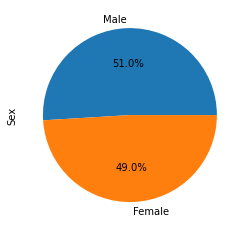

In [14]:
#generating pie plot using pyplot
labels = sex_values.index
plt.pie(sex_values, labels = labels, autopct='%1.1f%%')

#instead of using title here, I ended up applying the ylabel function in order to get it center left
plt.ylabel('Sex', rotation = 90, loc = 'center')

In [15]:
#set up for merge
groupby_mouse_ID = cleaned_mouse_study_df.groupby('Mouse ID')

#collected max timepoint values by Mouse ID
max_timepoint_data = groupby_mouse_ID['Timepoint'].max()

#created dataframe from this
max_timepoint_df = pd.DataFrame(max_timepoint_data)
max_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [16]:
#merged dataframes together
new = pd.merge(max_timepoint_data, cleaned_mouse_study_df, on = ['Timepoint', 'Mouse ID'])
new

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,a203,67.973419,2,Infubinol,Female,20,23
1,45,a251,65.525743,1,Infubinol,Female,21,25
2,45,a262,70.717621,4,Placebo,Female,17,29
3,45,a275,62.999356,3,Ceftamin,Female,20,28
4,30,a366,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,10,z435,48.710661,0,Propriva,Female,12,26
244,45,z578,30.638696,0,Ramicane,Male,11,16
245,45,z581,62.754451,3,Infubinol,Female,24,25
246,45,z795,65.741070,3,Naftisol,Female,13,29


In [17]:
#checking to ensure that only one value of timepoint and each mouse has one
check = new[['Mouse ID', 'Timepoint']].value_counts()
check

Mouse ID  Timepoint
z969      45           1
i334      45           1
j755      45           1
j365      45           1
j296      45           1
                      ..
q787      45           1
q633      45           1
q610      35           1
q597      45           1
a203      45           1
Length: 248, dtype: int64

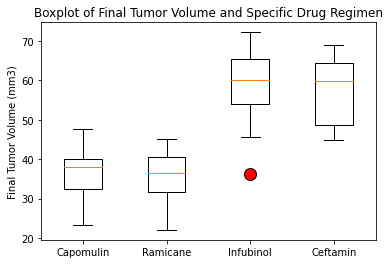

In [39]:
#boxplot
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_index_new = new.set_index('Drug Regimen')
drug_index_new

tumor_vol_list = []
for drug in treatment_list:
    treatment_new = drug_index_new.loc[drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(treatment_new)

fig1, ax1 = plt.subplots()
flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 12, linestyle = 'none')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Boxplot of Final Tumor Volume and Specific Drug Regimen')
ax1.boxplot(tumor_vol_list, 0, flierprops = flierprops, labels = treatment_list)
plt.show()

In [38]:
#iqr and outliers
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []
list_of_outliers = [Capomulin, Ramicane, Infubinol, Ceftamin]

for i in range(len(tumor_vol_list)):
    quartiles = tumor_vol_list[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    for x in range(len(tumor_vol_list[i])):
        if (tumor_vol_list[i][x] <= lower_bound) or (tumor_vol_list[i][x] >= upper_bound):
            outlier = tumor_vol_list[i].index[x], tumor_vol_list[i][x]
            list_of_outliers[i].append(outlier)

print(f"Capomulin's potential outliers: {list_of_outliers[0]}")
print(f"Ramicane's potential outliers: {list_of_outliers[1]}")
print(f"Infubinol's potential outliers: {list_of_outliers[2]}")
print(f"Ceftamin's potential outliers: {list_of_outliers[3]}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [('Infubinol', 36.321345799999996)]
Ceftamin's potential outliers: []


Please indicate specific Mouse ID desired.l509


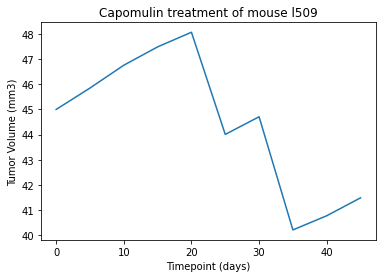

In [20]:
#line plot
#collecting data for Capomulin mouse
mouse_id_df = cleaned_mouse_study_df.set_index('Drug Regimen')
mouse_id_data = mouse_id_df.loc['Capomulin', :]

#finding specific mouse from example, but can be really done for any mouse
new_mouse_id_data = mouse_id_data.set_index('Mouse ID')

#collect data for any mouse you call upon from the Capomulin data
mouse_id = input('Please indicate specific Mouse ID desired.')
find_mouse_id = new_mouse_id_data.loc[mouse_id, :]
find_mouse_id

mouse_plot = plt.plot(find_mouse_id['Timepoint'], find_mouse_id['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title (f'Capomulin treatment of mouse {mouse_id}')
mouse_plot

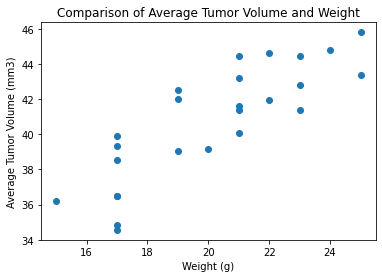

In [40]:
#scatter plot
mouse_data_scatter = mouse_id_data.groupby('Mouse ID')
weight_values = mouse_data_scatter['Weight (g)'].unique()
weight_values = weight_values.str[0]
tumor_and_weight = mouse_data_scatter['Tumor Volume (mm3)'].mean()

scatter_tumor_plot = plt.scatter(weight_values, tumor_and_weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Comparison of Average Tumor Volume and Weight')
scatter_tumor_plot

The correlation between mouse weight and the average tumor volume is 0.84


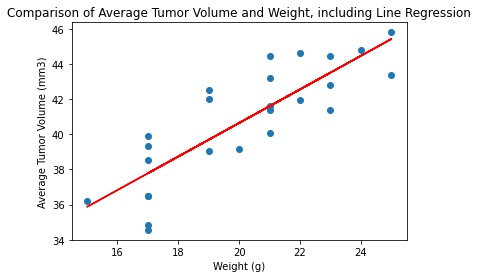

In [41]:
#correlation and regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_values, tumor_and_weight)
regress_values = weight_values * slope + intercept
plt.scatter(weight_values, tumor_and_weight)
plt.plot(weight_values, regress_values,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Comparison of Average Tumor Volume and Weight, including Line Regression')
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}')